In [1]:
# Install and Import Libraries

! pip install opendatasets
import opendatasets as od
!pip install plotly

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

! pip install cufflinks
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
#import chart_studio.plotly as py
import seaborn as sns
import cufflinks as cf
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
cf.go_offline() 


### Download the datasets from Kaggle

In [4]:
data =  "https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021"
od.download(data)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: surendra01
Your Kaggle Key: ········


100%|██████████| 55.2k/55.2k [00:00<?, ?B/s]

In [6]:
os.listdir('world-happiness-report-2021')

['world-happiness-report-2021.csv', 'world-happiness-report.csv']

In [7]:
world_df = pd.read_csv("world-happiness-report-2021/world-happiness-report-2021.csv")

In [8]:
world_df.head(10)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


### Data Wrangling

In [64]:
world_df.shape              # finding the number of columns and rows

(149, 20)

In [65]:
world_df.info()            # datatype of variable $ checking the null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [66]:
world_df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


In [67]:
a = world_df.iloc[:, :12]
a

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821


### Data Visualization

##### Data Visualization based on Regional indicator



In [68]:
plt.figure(figsize = (14,7))
sns.set_style('darkgrid')
           

<Figure size 1008x504 with 0 Axes>

<AxesSubplot:xlabel='Regional indicator', ylabel='Ladder score'>

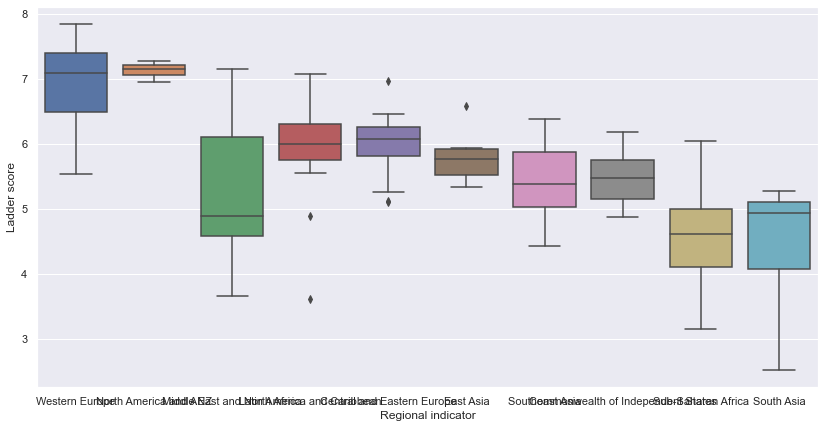

In [69]:
# 1) Scores of different Region
plt.figure(figsize = (14,7))
sns.boxplot(data = a, x = "Regional indicator", y = 'Ladder score' )

In [70]:
px.box(a, x = "Regional indicator", y = 'Ladder score' )

In [71]:
plt.figure(figsize = (20,10))
px.box(a, x = "Regional indicator", y = 'Ladder score', color = "Regional indicator" )

<Figure size 1440x720 with 0 Axes>

In [72]:
# 2) Scores of different region in 2021

In [73]:
px.pie(a, names = 'Regional indicator', values = 'Ladder score', title = "Regional ladder score of 2021")


In [74]:
# 3) Correlation between logged per capita and ladder score


In [75]:
px.scatter(a, x = 'Logged GDP per capita', y = 'Ladder score', color = 'Regional indicator')

In [76]:
px.scatter(a, x = 'Logged GDP per capita', y = 'Ladder score', color = 'Country name')

<AxesSubplot:xlabel='Logged GDP per capita', ylabel='Ladder score'>

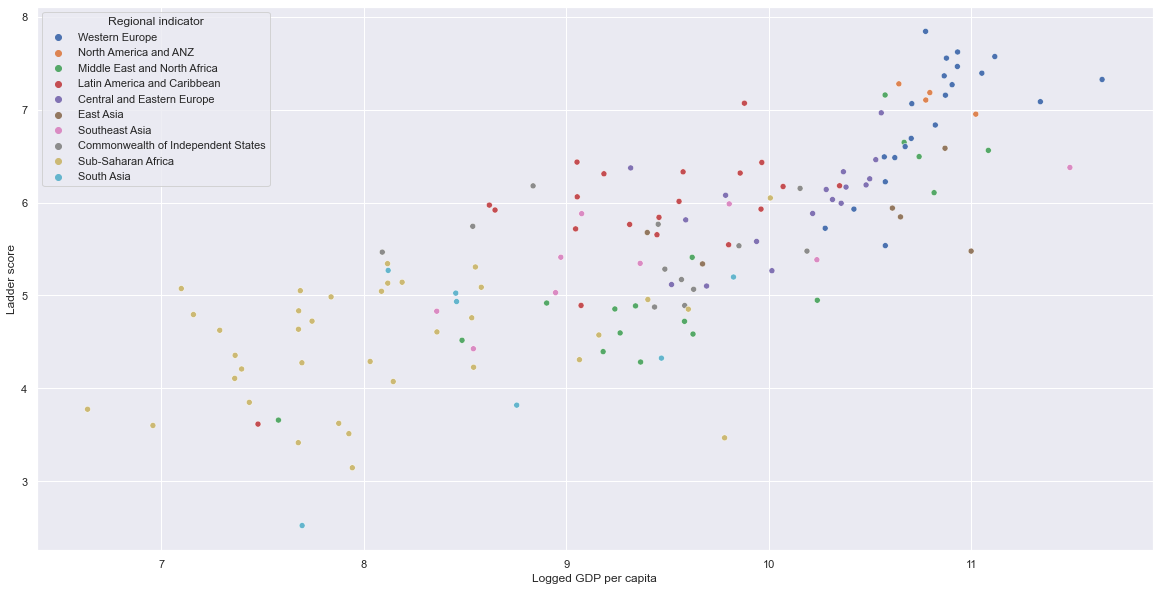

In [77]:
sns.set_style('darkgrid')
plt.figure(figsize = (20,10))
sns.scatterplot(data = a, x = 'Logged GDP per capita', y = 'Ladder score', hue = "Regional indicator")

In [78]:
a['Regional indicator'].unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [79]:
#defining a color for each region
dic_region={'Western Europe': 'purple', 'North America and ANZ' : 'red',
       'Middle East and North Africa' : 'lightgreen', 'Latin America and Caribbean' : 'pink',
       'Central and Eastern Europe' : 'orange', 'East Asia' : 'green', 'Southeast Asia' : 'yellow',
       'Commonwealth of Independent States' : 'lightblue', 'Sub-Saharan Africa': 'moccasin',
       'South Asia' :' darkslateblue'}

a['Region_color'] = a['Regional indicator'].map(dic_region)

In [80]:
fig =go.Figure()
fig.add_trace(go.Scatter(x= a['Logged GDP per capita'], y= a['Ladder score'], 
                    text=a['Regional indicator'],
                    mode='markers',
                    marker=dict(
                    color=a['Region_color'])))

fig.update_layout(yaxis_title = "Ladder score", xaxis_title = 'Logged GDP per capita', template= 'plotly_dark', 
                  title='Logged GDP per capita vs. Ladder score per Region')


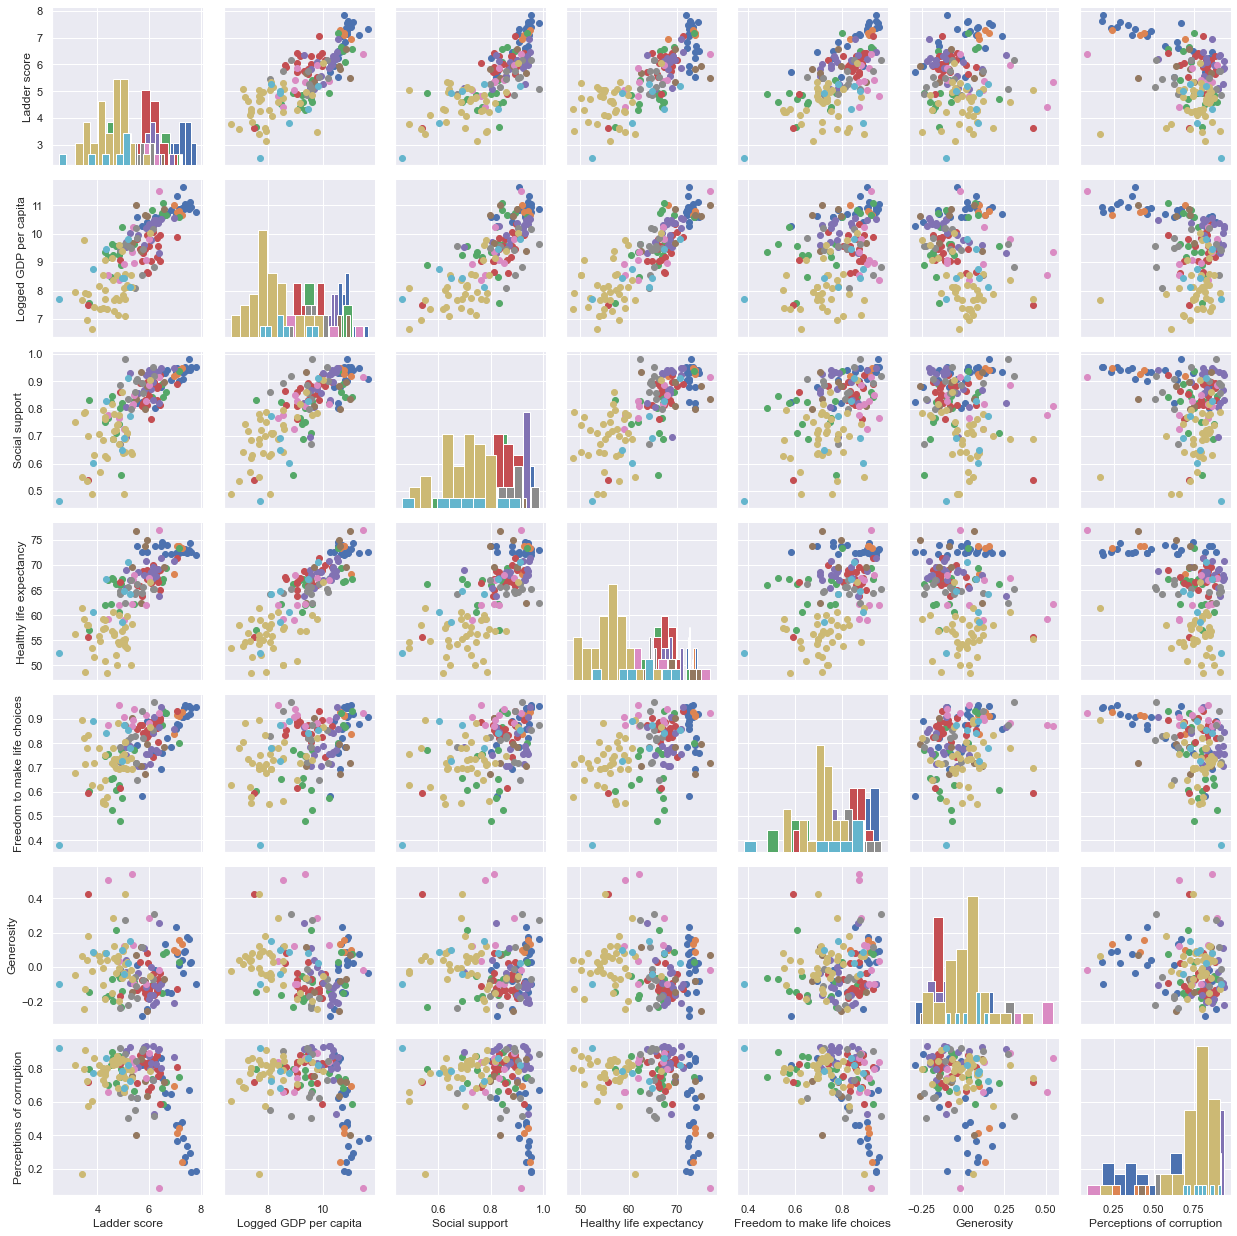

In [81]:
# 4 we can use sns.PairGrid
Features_Region=a[[ 'Regional indicator', 'Ladder score',
                      'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
                       'Freedom to make life choices', 'Generosity','Perceptions of corruption']]
Features_Region_p=sns.PairGrid(Features_Region, hue='Regional indicator')
Features_Region_p.map_diag(plt.hist)
Features_Region_p.map_offdiag(plt.scatter)

In [82]:
#5 by barplot

In [83]:
mean_by_region = a.groupby(['Regional indicator'])['Ladder score'].mean().reset_index(name = 'Ladder score').sort_values(by = 'Ladder score', ascending = True)

In [84]:
mean_by_region

,Regional indicator,Ladder score
6,South Asia,4.441857
8,Sub-Saharan Africa,4.494472
4,Middle East and North Africa,5.219765
7,Southeast Asia,5.407556
1,Commonwealth of Independent States,5.467000
2,East Asia,5.810333
3,Latin America and Caribbean,5.908050
0,Central and Eastern Europe,5.984765
9,Western Europe,6.914905
5,North America and ANZ,7.128500


In [85]:
px.bar(y = mean_by_region['Regional indicator'], 
       x = mean_by_region['Ladder score'],
       color = mean_by_region['Ladder score'])

### Data visualization base on country name

In [86]:
#6  Finding worst and best countries 

In [87]:
q1 = a['Ladder score'].quantile(0.10)

In [88]:
q2 = a['Ladder score'].quantile(0.90)

In [89]:
mean = a['Ladder score'].mean()

In [91]:
q10 = a['Ladder score'].quantile(.10)
q90 = a['Ladder score'].quantile(.90)
mean = a['Ladder score'].mean()

Worse_Countries = a[a['Ladder score'] < q10]

Best_Countries = a[a['Ladder score'] > q90]

Best_and_Worse_Countries =pd.concat([Best_Countries, Worse_Countries])
#show happines score in worst and best countries
px.bar(Best_and_Worse_Countries, y='Ladder score', x= 'Country name' , title= 'Ladder score of Best Countries 2021', 
      color= 'Ladder score')

In [92]:
#7 scatterplot between happiness score and gdf of country 

In [93]:
px.scatter(Best_and_Worse_Countries, x = 'Logged GDP per capita', y = 'Ladder score', color = 'Country name', title = "Realtion")

In [94]:
df_y = pd.read_csv("world-happiness-report-2021/world-happiness-report.csv")

In [95]:
df_y

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [96]:
#Top Countries over years
df_country=df_y.groupby(['Country name'])['Life Ladder'].mean().reset_index(name='mean life ladder').sort_values(by='mean life ladder', ascending= False)
top_countries = df_country.head(10)
top_countries

,Country name,mean life ladder
39,Denmark,7.680400
47,Finland,7.597154
143,Switzerland,7.548300
111,Norway,7.512400
104,Netherlands,7.466286
62,Iceland,7.446500
25,Canada,7.376333
142,Sweden,7.369467
105,New Zealand,7.310286
6,Australia,7.282071


In [97]:
df2020= df_y.loc[ df_y['year'] == 2020]
df_country2020=df2020.groupby(['Country name'])['Life Ladder'].mean().reset_index(name='mean life ladder').sort_values(by='mean life ladder', ascending= False)
top_countries2020 = df_country2020.head(10)
top_countries2020

,Country name,mean life ladder
28,Finland,7.889
36,Iceland,7.575
21,Denmark,7.515
79,Switzerland,7.508
62,Netherlands,7.504
78,Sweden,7.314
31,Germany,7.312
66,Norway,7.290
63,New Zealand,7.257
3,Austria,7.213


In [98]:
df_Denmark = df_y.loc[df_y['Country name'] == 'Denmark']
df_Finland = df_y.loc[df_y['Country name'] == 'Finland']
df_Switzerland = df_y.loc[df_y['Country name'] == 'Switzerland']
df_Norway =df_y.loc[df_y['Country name'] == 'Norway']
df_Netherlands = df_y.loc[df_y['Country name'] == 'Netherlands']
df_Iceland = df_y.loc[df_y['Country name'] == 'Iceland']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_Denmark.year , y=df_Denmark['Life Ladder'], mode='lines+markers' , name='Denmark'))

fig.add_trace(go.Scatter(x=df_Finland.year , y=df_Finland['Life Ladder'], mode='lines+markers' , name='Finland'))

fig.add_trace(go.Scatter(x=df_Switzerland.year , y=df_Switzerland['Life Ladder'], mode='lines+markers' , name='Switzerland' , 
                         line=dict(color = 'green', width =2 )))

fig.add_trace(go.Scatter(x=df_Norway.year , y=df_Norway['Life Ladder'], mode='lines+markers' , name='Norway' , 
                         line=dict(color = 'yellow', width =2 )))

fig.add_trace(go.Scatter(x=df_Netherlands.year , y=df_Netherlands['Life Ladder'], mode='lines+markers' , name='Netherlands' , 
                         line=dict(color = 'white', width =2 )))

fig.add_trace(go.Scatter(x=df_Iceland.year , y=df_Iceland['Life Ladder'], mode='lines+markers' , name='Iceland' , 
                         line=dict(color = 'Orange', width =2 )))

fig.update_layout(title='Life Latter Score for top 6 countries over Years', xaxis_title= 'Year', yaxis_title = 'Life Score' , template= 'plotly_dark')
